# Titanic: Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
>
>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
>
>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
>
>#### Goal
>
>It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.
>
>#### Metric
>
>Your score is the percentage of passengers you correctly predict. This is known simply as "[accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification)”.

From the competition [homepage](https://www.kaggle.com/c/titanic).

### Goal for this Notebook

### Data
Loading train data with pandas.

In [20]:
import pandas as pd
from IPython.display import display

def display_tab(df):
    display(df.head(7))
    print("DataFrame shape: {}".format(df.shape))

df = pd.read_csv("data/train.csv")
display_tab(df)
display(df.isnull().sum().sort_values(ascending=False))
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


DataFrame shape: (891, 12)


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Risien, Mr. Samuel Beard",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [2]:
titanic = df.copy()

# Dropping and removing NaN values
titanic = titanic.drop(['PassengerId','Ticket','Cabin'], axis=1)
titanic = titanic.dropna()

# Transforming categorical values
titanic['Survived'] = titanic['Survived'].map({1: 'Survived', 0: 'Died'})
titanic['Pclass'] = titanic['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

display_tab(titanic)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,Died,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,Died,Third,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,Died,First,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,Died,Third,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S


DataFrame shape: (712, 9)


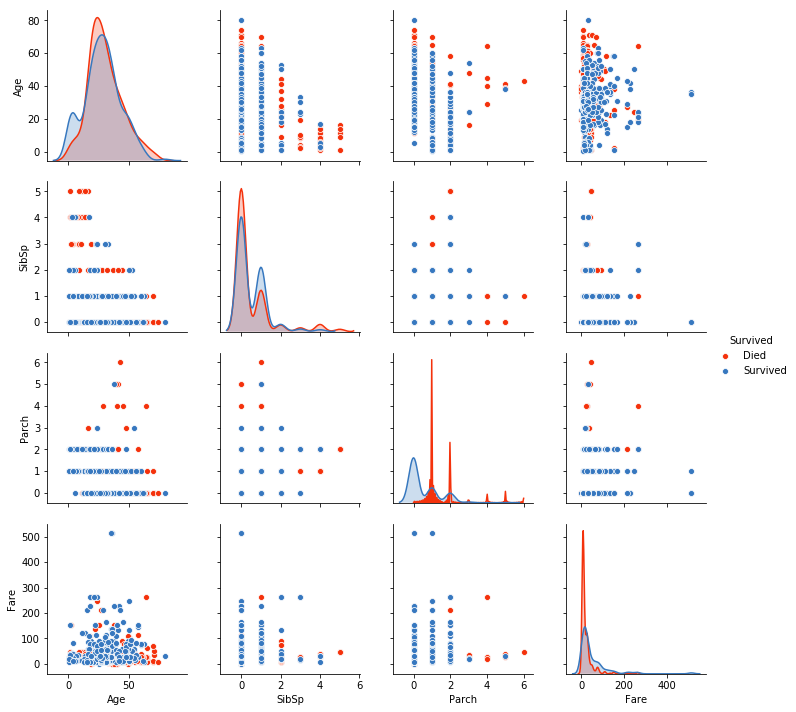

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

colors = ["vermillion", "windows blue", "leaf green", "iris", "amber", "greyish"]
sns.set_palette(sns.xkcd_palette(colors))

display(sns.pairplot(titanic, hue='Survived'))

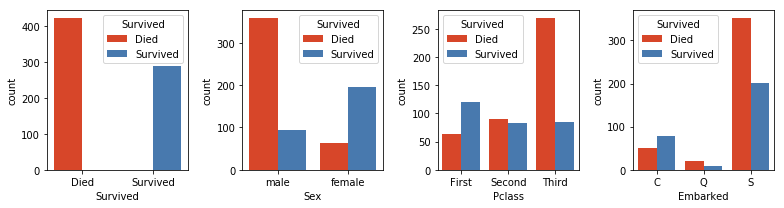

In [4]:
category_label = ['Survived', 'Sex', 'Pclass', 'Embarked']
category_order = [['Died', 'Survived'], ['male', 'female'], 
                  ['First', 'Second', 'Third'], ['C', 'Q', 'S']]

fig, axes = plt.subplots(1, 4, figsize=(11,3))

for ax, x, order in zip(axes, category_label, category_order):
    sns.countplot(x=x, order=order, hue='Survived', data=titanic, ax=ax)

fig.tight_layout()

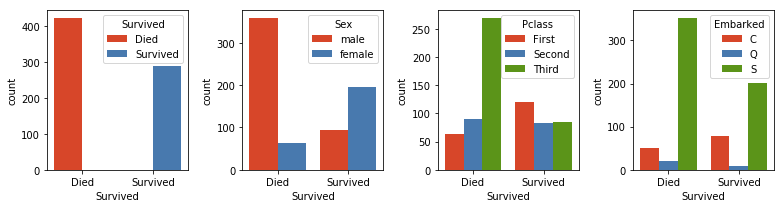

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(11,3))

for ax, x, order in zip(axes, category_label, category_order):
    sns.countplot(x='Survived', hue=x, hue_order=order, data=titanic, ax=ax)

fig.tight_layout()

### Supervised Machine Learning

In [6]:
# module imports
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm

# create matrices
#formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare + C(Embarked)'
#y, X = dmatrices(formula, df, return_type = 'dataframe')

formulas = ['Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare + C(Embarked)',
            'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare',
            'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)',
            'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Fare + C(Embarked)',
            'Survived ~ C(Pclass) + C(Sex) + Age + Parch + Fare + C(Embarked)']
models = []

for formula in formulas:
    y, X = dmatrices(formula, df, return_type = 'dataframe')
    logit = sm.Logit(y, X)
    model = logit.fit()
    print('Formula: {}\n{}\n'.format(formula, model.params))
    models.append(model)

Optimization terminated successfully.
         Current function value: 0.444060
         Iterations 6
Formula: Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare + C(Embarked)
Intercept           4.432931
C(Pclass)[T.2]     -1.189637
C(Pclass)[T.3]     -2.395220
C(Sex)[T.male]     -2.637859
C(Embarked)[T.Q]   -0.823379
C(Embarked)[T.S]   -0.402848
Age                -0.043308
SibSp              -0.362925
Parch              -0.060365
Fare                0.001451
dtype: float64

Optimization terminated successfully.
         Current function value: 0.445221
         Iterations 6
Formula: Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare
Intercept         4.179995
C(Pclass)[T.2]   -1.292538
C(Pclass)[T.3]   -2.501069
C(Sex)[T.male]   -2.637451
Age              -0.044159
SibSp            -0.376847
Parch            -0.061268
Fare              0.002043
dtype: float64

Optimization terminated successfully.
         Current function value: 0.444291
         Iterations 6
Formul

In [7]:
tdf = pd.read_csv("data/test.csv")
tdf.fillna(tdf.mean(), inplace=True)
tdf['Survived'] = 0.5
display_tab(tdf)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.5
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.5
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.5
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.5
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.5
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.5


DataFrame shape: (418, 12)


In [8]:
def submission(df, filename="submission.csv", path = "data/output/"):
    res = df[['PassengerId', 'Survived']].copy()
    res = res.round({'Survived': 0})
    res = res.astype({'Survived': int})
    res.to_csv(path + filename, index=False)

In [9]:
for i, (formula, model) in enumerate(zip(formulas, models)):
    yt, Xt = dmatrices(formula, tdf, return_type='dataframe')
    y_pred = model.predict(Xt)
    tdf['Survived'] = y_pred
    submission(tdf, "{}_logit_regression_submission.csv".format(i+1))

#### Results as scored by kaggle: RMSE = 0.76076  
The fifth formula is the best scored.

| Formula | Score |
| :------ | ----- |
| Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare + C(Embarked) | 0.75119 |
| Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare | 0.75119 |
| Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked) | 0.75119 |
| Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Fare + C(Embarked) | 0.74641 |
| Survived ~ C(Pclass) + C(Sex) + Age + Parch + Fare + C(Embarked) | 0.76076 |

In [10]:
from sklearn.linear_model import LogisticRegression
# sklearn output
model = LogisticRegression(solver='liblinear', fit_intercept = False, C = 1e9)
mdl = model.fit(X, y.values.ravel())
#display(model.coef_)

y_pred = mdl.predict(Xt)

tdf['Survived'] = y_pred
display_tab(tdf)

submission(tdf, "sk_logit_regression_submission.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.0


DataFrame shape: (418, 12)


### Scikit learn classifiers

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

In [15]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB()]

In [16]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + Fare + C(Embarked)'
y, X = dmatrices(formula, df, return_type = 'dataframe')
y = y.values.ravel()

accuracies = []

for name, clf in zip(names, classifiers):
    # Training
    clf.fit(X, y)
    # Testing
    pred = clf.predict(X)
    accuracy = accuracy_score(y, pred) * 100
    accuracies.append(accuracy)
    # [example] Accuracy for [model]: [Accuracy]
    print('Accuracy for {}: {}'
          .format(name, accuracy))

Accuracy for Nearest Neighbors: 82.86516853932584
Accuracy for Linear SVM: 77.9494382022472


/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy for RBF SVM: 88.06179775280899
Accuracy for Gaussian Process: 78.79213483146067
Accuracy for Decision Tree: 98.59550561797754
Accuracy for Random Forest: 98.59550561797754
Accuracy for Neural Net: 83.28651685393258
Accuracy for AdaBoost: 82.86516853932584
Accuracy for Naive Bayes: 78.65168539325843


In [18]:
for i, (name, clf) in enumerate(zip(names, classifiers)):
    yt, Xt = dmatrices(formula, tdf, return_type='dataframe')
    pred = clf.predict(Xt)
    print(name)
    tdf['Survived'] = pred
    display_tab(tdf)
    submission(tdf, "{}_{}_submission.csv".format(i+1, name))

Nearest Neighbors


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.0


DataFrame shape: (418, 12)
Linear SVM


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1.0


DataFrame shape: (418, 12)
RBF SVM


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.0


DataFrame shape: (418, 12)
Gaussian Process


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1.0


DataFrame shape: (418, 12)
Decision Tree


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.0


DataFrame shape: (418, 12)
Random Forest


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.0


DataFrame shape: (418, 12)
Neural Net


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.0


DataFrame shape: (418, 12)
AdaBoost


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1.0


DataFrame shape: (418, 12)
Naive Bayes


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.0


DataFrame shape: (418, 12)
